In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler

In [2]:
url ="https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
col_name = ["age","sex","cp","trestbps","chol","fbs","restecg","thalach","exang","oldpeak","slope","ca","thal","target"]
data = pd.read_csv(url, names=col_name, na_values="?")

In [3]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  target    303 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 33.3 KB


In [5]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


In [6]:
data.shape

(303, 14)

In [7]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64

<Axes: >

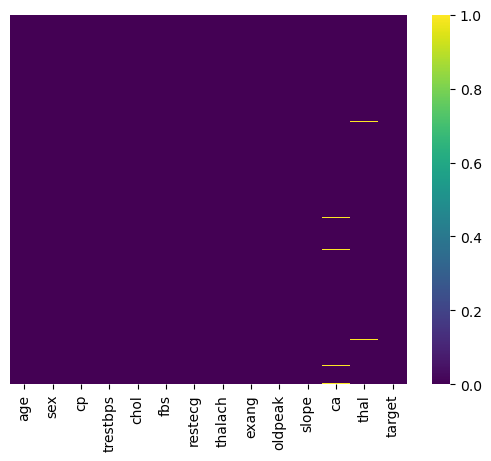

In [8]:
sns.heatmap(data.isnull(),yticklabels=False,cmap="viridis")

In [9]:
data['ca'].fillna(data['ca'].mean(), inplace = True)
data['thal'].fillna(data['thal'].mean(), inplace = True)

<Axes: >

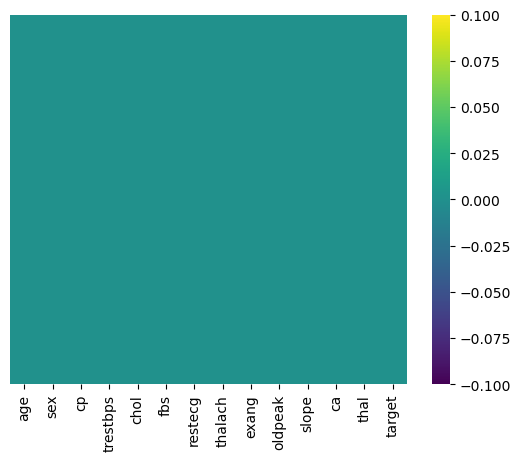

In [10]:
sns.heatmap(data.isnull(),yticklabels=False,cmap="viridis")

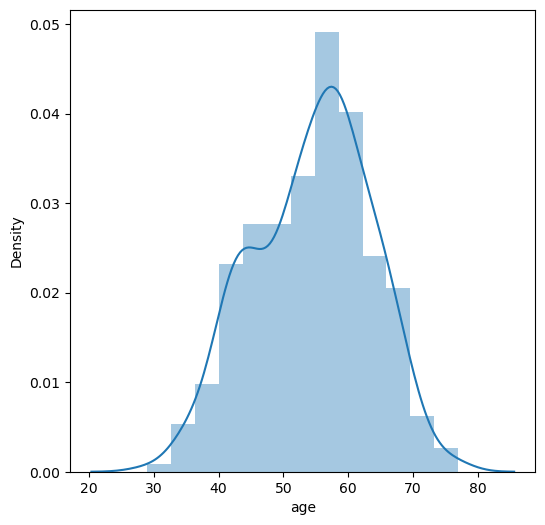

In [11]:
plt.figure(figsize=(6,6))
sns.distplot(data['age'])
plt.show()

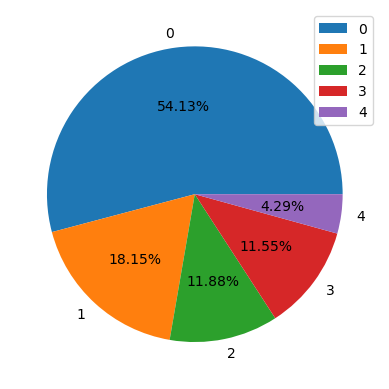

In [12]:
a=data.groupby('target')['target'].count()
plt.pie(a,labels=a.index,autopct="%.2f%%")
plt.legend()
plt.show()

<Axes: xlabel='age', ylabel='Count'>

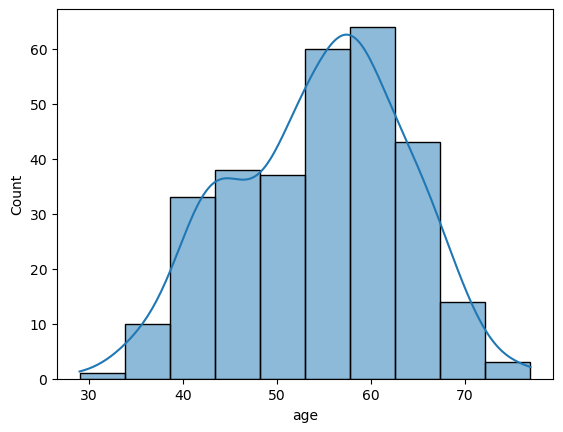

In [13]:
sns.histplot(data["age"],bins=10,kde=True)

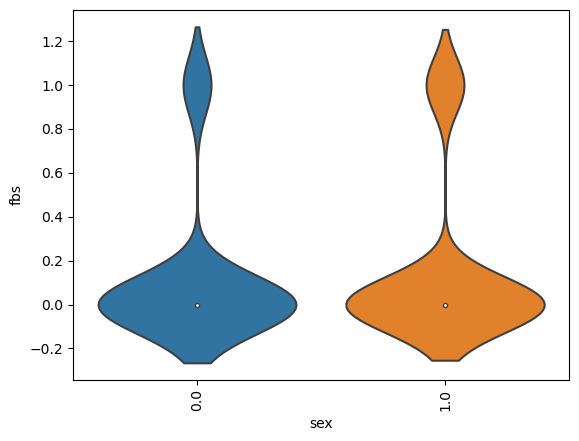

In [14]:
sns.violinplot(x="sex",y="fbs",data=data)
plt.xticks(rotation=90)
plt.show()

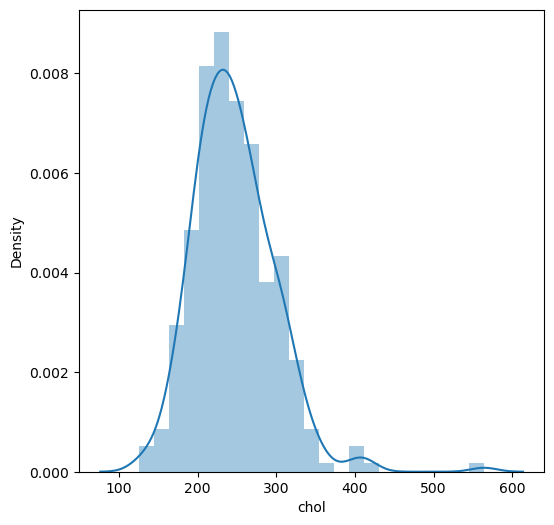

In [15]:
plt.figure(figsize=(6,6))
sns.distplot(data['chol'])
plt.show()

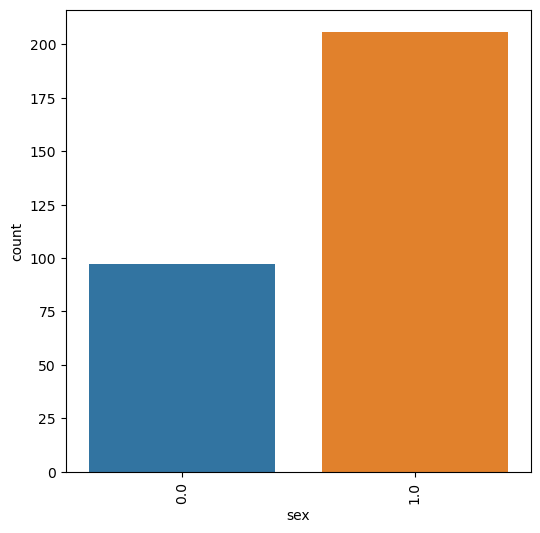

In [16]:
plt.figure(figsize=(6,6))
sns.countplot(x='sex',data=data)
plt.xticks(rotation=90)
plt.show()

<Axes: ylabel='chol'>

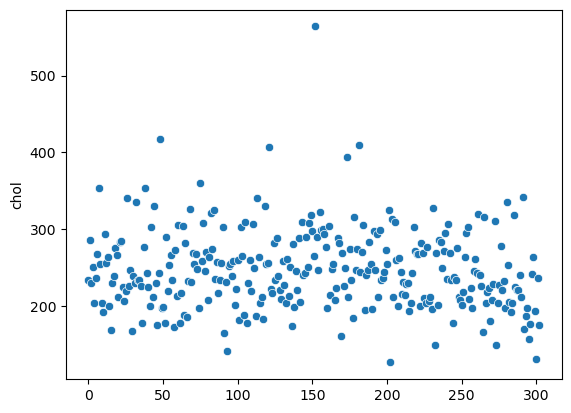

In [17]:
sns.scatterplot(data.chol)

<Axes: xlabel='age', ylabel='sex'>

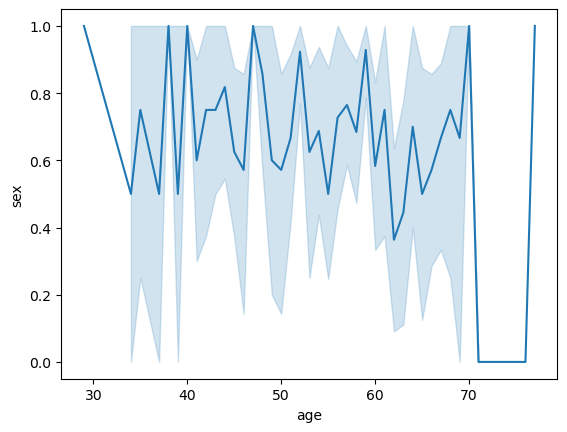

In [18]:
sns.lineplot(x='age', y='sex', data=data)

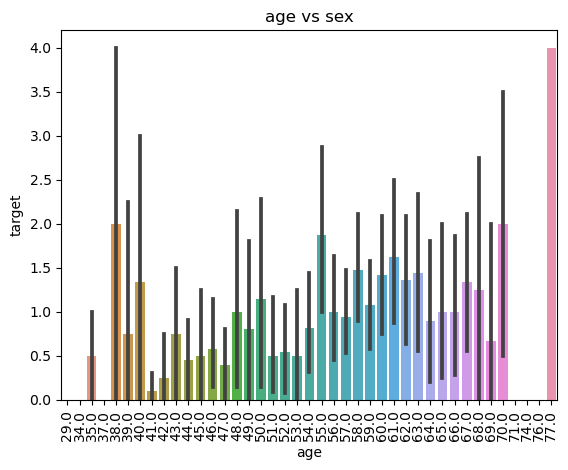

In [19]:
sns.barplot(y='target', x='age',data=data, orient='v')
plt.title ('age vs sex')
plt.xticks(rotation=90)
plt.show()

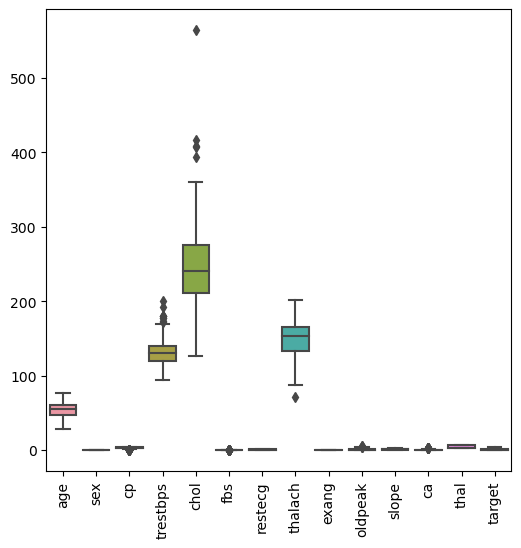

In [20]:
plt.figure(figsize=(6,6))
sns.boxplot(data)
plt.xticks(rotation=90)
plt.show()

In [21]:
def remove_outlier_IQR(data,col):
    Q1=data[col].quantile(0.25)
    Q3=data[col].quantile(0.75)
    IQR=Q3-Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound =Q3 + 1.5 * IQR
    return data[(data[col] > lower_bound) & (data[col]<upper_bound)]

In [22]:
imp_col =['trestbps','thalach','chol']

In [23]:
for col in imp_col:
    data= remove_outlier_IQR(data,col)

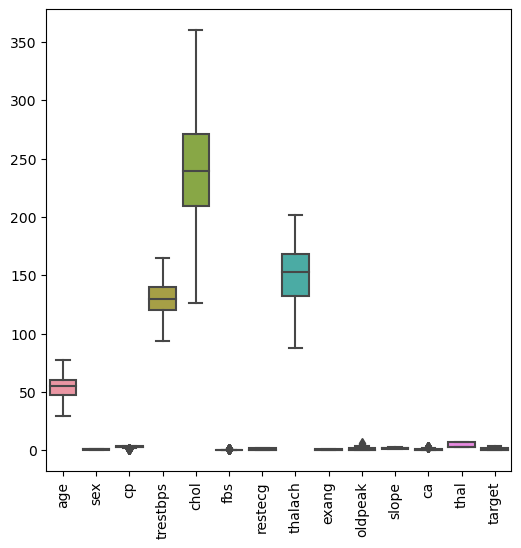

In [24]:
plt.figure(figsize=(6,6))
sns.boxplot(data)
plt.xticks(rotation=90)
plt.show()

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder,StandardScaler

In [26]:
encoder = LabelEncoder()

In [27]:
data['trestbps'] = encoder.fit_transform(data['trestbps'])

data['chol'] = encoder.fit_transform(data['chol'])

In [28]:
numerical_cols=["age","sex","cp","trestbps","chol","fbs","restecg","thalach","exang","oldpeak","slope","ca","thal","target"]
scaler=StandardScaler()
scaled_cols=pd.DataFrame(scaler.fit_transform(data[numerical_cols]),columns=scaler.get_feature_names_out(numerical_cols))

In [29]:
scaled_cols

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.987954,0.659047,-2.273350,1.044449,-0.177736,2.506402,1.045055,0.012669,-0.681115,1.160123,2.336236,-0.724728,0.692561,-0.745590
1,1.428078,0.659047,0.891510,1.974304,1.072640,-0.398978,1.045055,-1.830212,1.468181,0.448514,0.693932,2.513363,-0.870387,0.895864
2,1.428078,0.659047,0.891510,-0.711943,-0.286465,-0.398978,1.045055,-0.908771,1.468181,1.426976,0.693932,1.433999,1.213544,0.075137
3,-1.872851,0.659047,-0.163443,0.114595,0.229995,-0.398978,-0.967119,1.636159,-0.681115,2.227536,2.336236,-0.724728,-0.870387,-0.745590
4,-1.432727,-1.517342,-1.218397,0.114595,-0.966017,-0.398978,1.045055,0.977988,-0.681115,0.359563,-0.948373,-0.724728,-0.870387,-0.745590
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,-0.992603,0.659047,-2.273350,-1.331846,0.583362,-0.398978,-0.967119,-0.777137,-0.681115,0.181661,0.693932,-0.724728,1.213544,0.075137
280,1.538109,0.659047,0.891510,0.941132,-1.210656,2.506402,-0.967119,-0.382234,-0.681115,2.138585,0.693932,1.433999,1.213544,0.895864
281,0.327768,0.659047,0.891510,0.114595,-1.890209,-0.398978,-0.967119,-1.523065,1.468181,0.181661,0.693932,0.354636,1.213544,1.716591
282,0.327768,-1.517342,-1.218397,0.114595,-0.096190,-0.398978,1.045055,1.065744,-0.681115,-0.885752,0.693932,0.354636,-0.870387,0.075137


In [30]:
x = data.drop('target',axis=1)
y = data['target']

In [31]:
x_train,x_test, y_train, y_test = train_test_split(x,y, test_size=0.2,random_state=2)

In [32]:
scale=StandardScaler()
s_train = scale.fit_transform(x_train)
x_test=scale.transform(x_test)

In [33]:
classi = DecisionTreeClassifier(random_state = 2)
classi.fit(x_train,y_train)

DecisionTreeClassifier(random_state=2)

In [34]:
y_pred = classi.predict(x_test)

In [35]:
acc = accuracy_score(y_test,y_pred)

In [36]:
print(f"Accuracy:{acc:.2f}")

Accuracy:0.60


In [37]:
print('Classification Report')
print(classification_report(y_test, y_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.60      1.00      0.75        34
           1       0.00      0.00      0.00         9
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         2

    accuracy                           0.60        57
   macro avg       0.12      0.20      0.15        57
weighted avg       0.36      0.60      0.45        57



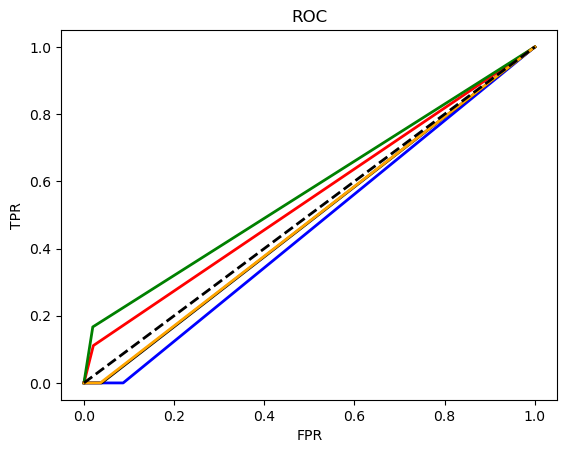

In [38]:
from sklearn.metrics import roc_curve,auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

#roc curve
yb=label_binarize(y, classes=[0,1,2,3,4])
nc = yb.shape[1] 
classifier = OneVsRestClassifier(classi)
y_score=classifier.fit(x_train,y_train).predict(x_test)
fpr=dict()
tpr=dict()
roc_auc=dict()

for i in range (nc):
    fpr[i],tpr[i],_=roc_curve(y_test == i, y_score)
    roc_auc[i]=auc(fpr[i],tpr[i])
plt.figure()
color=['blue','red','green','black','orange']
for i, color in zip(range(nc),color):
    plt.plot(fpr[i],tpr[i],color=color, lw=2, label='ROC (area={:.2f}) for class {}'.format(roc_auc[i],data['target'][i]))
plt.plot([0,1],[0,1],'k--',lw=2)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC')
plt.show()

In [39]:
#sns.swarmplot(data=data)

In [40]:
from sklearn.svm import SVC
classifier = SVC(kernel='rbf')
classifier.fit(x_train,y_train)

y_pred=classifier.predict(x_test)


from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_pred,y_test)


y_pred_train=classifier.predict(x_train)
cm_train = confusion_matrix(y_pred_train,y_train)

print()
print("Accuracy for training set for svm={}".format((cm_train[0][0]+cm_train[1][1])/len(y_train)))
print("Accuracy for testing set for svm={}".format((cm_train[0][0]+cm_train[1][1])/len(y_test)))


Accuracy for training set for svm=0.5418502202643172
Accuracy for testing set for svm=2.1578947368421053


In [41]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train,y_train)

y_pred=classifier.predict(x_test)


from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_pred,y_test)


y_pred_train=classifier.predict(x_train)
cm_train = confusion_matrix(y_pred_train,y_train)

print()
print("Accuracy for training set for Naive Bayes={}".format((cm_train[0][0]+cm_train[1][1])/len(y_train)))
print("Accuracy for testing set for Naive Bayes={}".format((cm_train[0][0]+cm_train[1][1])/len(y_test)))


Accuracy for training set for Naive Bayes=0.5198237885462555
Accuracy for testing set for Naive Bayes=2.0701754385964914


In [42]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(x_train,y_train)

y_pred=classifier.predict(x_test)


from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_pred,y_test)


y_pred_train=classifier.predict(x_train)
cm_train = confusion_matrix(y_pred_train,y_train)

print()
print("Accuracy for training set for Logistic Regression={}".format((cm_train[0][0]+cm_train[1][1])/len(y_train)))
print("Accuracy for testing set for Logistic Regression={}".format((cm_train[0][0]+cm_train[1][1])/len(y_test)))


Accuracy for training set for Logistic Regression=0.5506607929515418
Accuracy for testing set for Logistic Regression=2.192982456140351


In [43]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
classifier.fit(x_train,y_train)

y_pred=classifier.predict(x_test)


from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_pred,y_test)


y_pred_train=classifier.predict(x_train)
cm_train = confusion_matrix(y_pred_train,y_train)

print()
print("Accuracy for training set for KNeighborsClassifier={}".format((cm_train[0][0]+cm_train[1][1])/len(y_train)))
print("Accuracy for testing set for KNeighborsClassifier={}".format((cm_train[0][0]+cm_train[1][1])/len(y_test)))


Accuracy for training set for KNeighborsClassifier=0.5814977973568282
Accuracy for testing set for KNeighborsClassifier=2.3157894736842106
